# Negative feedback Ocsilation

In [46]:
def Hill_repress(x,K,n):
    return K**n/(K**n+x**n)

def Hill_activate(x, K, n):
    return x ** n / (K**n +x**n)
def negative_feedback_loop(u, t, alphaX, betaX, K, n):
    x,y = u
    dxdt = betaX* Hill_repress(y, K, n) - alphaX* x
    dydt = betaX* Hill_activate(x, K, n) - alphaX* y
    
    return [dxdt,dydt]


    

In [52]:
t = np.linspace(0,6)
n = 5
alphaX = 1
betaX = 5
K = 2.5
u0 = [4,4.5]


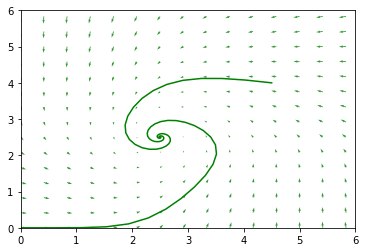

In [51]:
from scipy.integrate import odeint
u = odeint(negative_feedback_loop,u0,t,args=(alphaX,betaX,K,n))

x_coords = np.linspace(0, 10, num = 25)
y_coords = np.linspace(0, 10, num = 25)


x_gradients = np.array([[betaX* Hill_repress(y,K,n) - alphaX * x for x in x_coords] for y in y_coords])
y_gradients = np.array([[betaX* Hill_activate(x,K,n) - alphaX * y for x in x_coords] for y in y_coords])
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.quiver(x_coords, y_coords, x_gradients, y_gradients, alpha = 0.8, color='g')
plt.plot(u[:,0], u[:,1], 'g-')
plt.plot(u1[:,0], u1[:,1], 'g-')

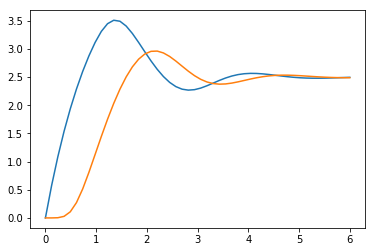

In [54]:
plt.plot(t,u[:,0])
plt.plot(t,u[:,1])

## Repressilator

In [55]:
import numpy as np
def Hill_repress(x,K,n):
    return K**n/(K**n+x**n)

def X_i(x_i,x_j,alphaX,betaX,K,n):
    return betaX*Hill_repress(x_j,K,n)-(alphaX*x_i)

def Repressilator_rate(u,t,alphaX,betaX,K,n):
    x = u
    end = len(x)-1
    dxdt = []
    dxdt.append(X_i(x[0],x[end],alphaX,betaX,K,n))
    for i in range(1,len(x)):
        dxdt.append(X_i(x[i],x[i-1],alphaX,betaX,K,n))
    return dxdt

alphaX = 2
betaX = 6
K = .1
n =3

In [56]:
from scipy.integrate import odeint
x0 = .5*np.zeros(3)
x0[0] = .5
t = np.linspace(0,20,1000)
r = odeint(Repressilator_rate,x0,t,args=(alphaX,betaX,K,n))
assert(len(x0)%2==1)

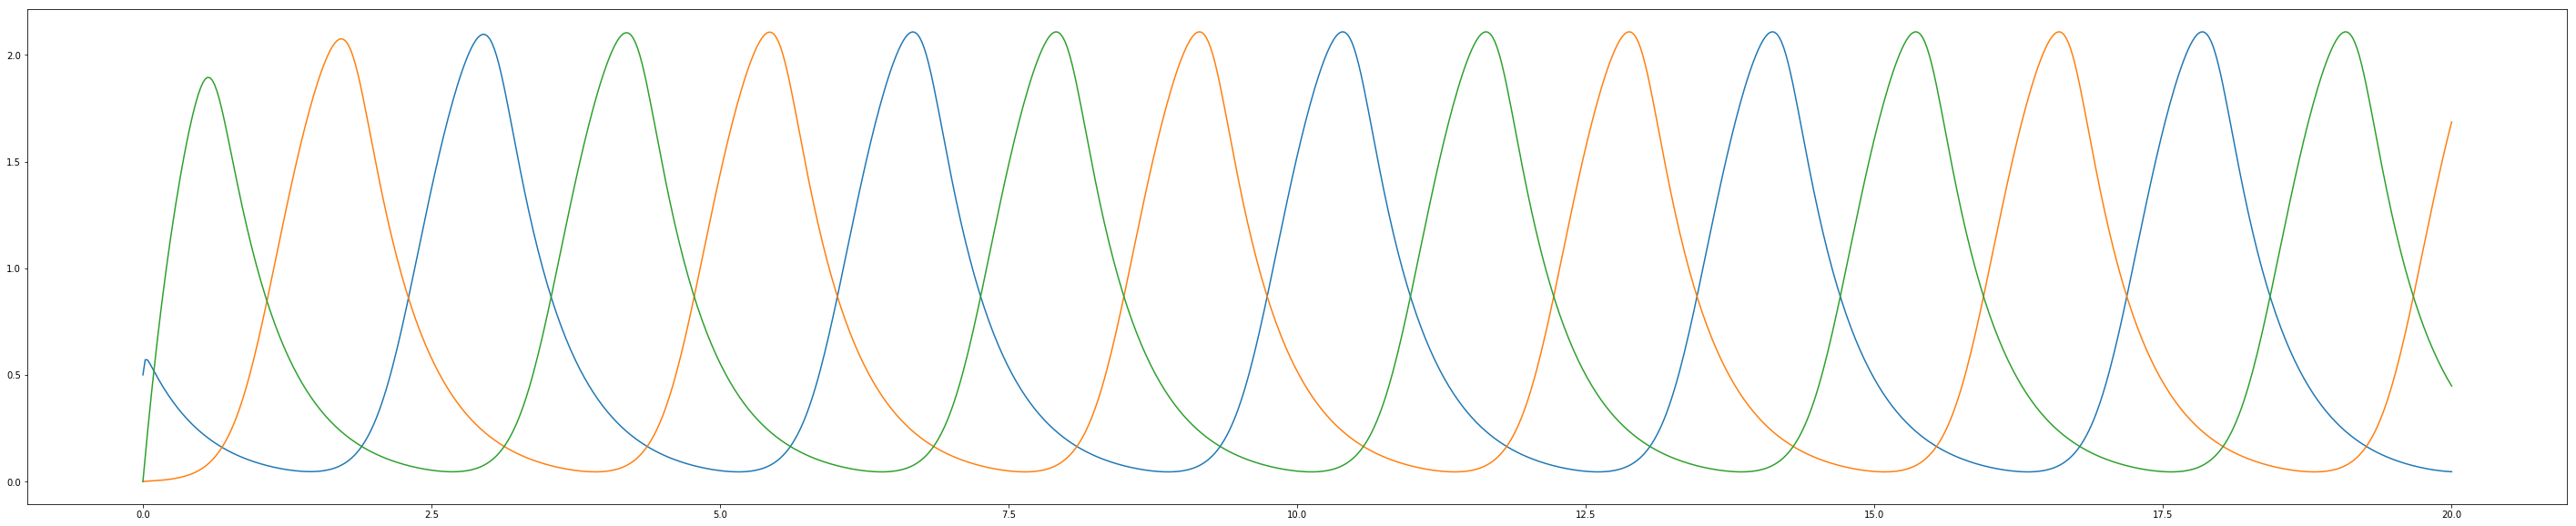

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(50,10))
plt.plot(t,r)
#plt.grid()

## Ocsilations analysis

In [244]:
from scipy.optimize import fsolve
betavals = np.linspace(1,10,1000)
alphavals = np.linspace(1,10,1000)


def fstar(x,alpha,beta,K,n):
    return (beta/alpha)*Hill_repress(x,K,n)-x
gamma = np.zeros_like(betavals)

for i in range(len(alphavals)):
    xstar = fsolve(fstar,K,args=(alphavals[i],betaX,K,n))
    gamma[i] = xstar/K

def g(beta,alpha,k,gamma,n):
    return -(beta/(alpha*k*(gamma**(n+1))*n))    
    
osc = -g(betaX,alphavals,K,gamma,n)
    
plt.plot()

#g(betaX,alphaX,K,1,n)

## oscilation through positive auto regulation

In [284]:
def Hill_produce(x,K,n):
    return x**n/(K**n+x**n)
def X_auto(x,y,alphaX,betaX,K,n):
    return betaX*(Hill_produce(x,K,n)+Hill_repress(y,K,n)-(Hill_produce(x,K,n)*Hill_repress(y,K,n)))-(alphaX*x)
def X(x,y,alphaX,betaX,K,n):
    return betaX*Hill_repress(y,K,n)-(alphaX*x)
def Y(y,x,alphaY,betaY,K,n):
    return betaX*Hill_produce(x,K,n)-(alphaY*y)

def rate_osc_auto(u,t,alphaX,betaX,alphaY,betaY,K,n):
    x,y = u
    dxdt = X_auto(x,y,alphaX,betaX,K,n)
    #dxdt = X(x,y,alphaX,betaX,K,n)
    dydt = Y(y,x,alphaY,betaY,K,n)
    return [dxdt,dydt]

def rate_osc_auto_linear(u,t,alphaX,betaX0,betaX1,alphaY,betaY):
    x,y = u
    dxdt = betaX0 * x - betaX1*y - alphaX * x
    dydt = betaY * x - alphaY * y
    return [dxdt,dydt]

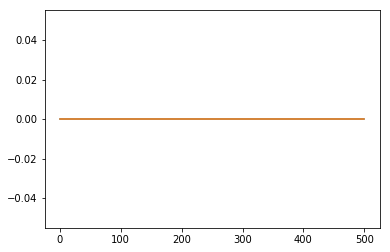

In [286]:
alphaX = .2
betaX = 2

alphaY = .5
betaY = 2

K = .5
n =20


#linear
betaX0 = 2
betaX1 = 3

from scipy.integrate import odeint
t = np.linspace(0,500,1000)
#r = odeint(rate_osc_auto,[0,0],t,args=(alphaX,betaX,alphaY,betaY,K,n))
r = odeint(rate_osc_auto_linear,[0,0],t,args=(alphaX,betaX0,betaX1,alphaY,betaY))
plt.plot(t,r)